# PCA on EPL Data for 21/22 season

### Global Libraries

In [1]:
# import the key packages for data analysis
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
#import dataframe from csv file; we use the players' names as index
performanceData = pd.read_csv("EPL2122.csv",index_col="player")

print("The dataset has {} attributes.".format(performanceData.shape[1]))
performanceData.head()

The dataset has 76 attributes.


,team,appearances,matchesStarted,position,minutesPlayed,goals,bigChancesMissed,successfulDribbles,successfulDribblesPercentage,totalShots,...,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,wasFouled,fouls,dispossessed,possessionLost
player,,,,,,,,,,,,,,,,,,,,,
Kevin De Bruyne,Manchester City,30,25,Midfielder,2205,15,0,31,56.36,78,...,89,49.72,12,40.00,101,48.33,27,21,20,482
Trent Alexander-Arnold,Liverpool,32,32,Defender,2853,2,0,19,48.72,51,...,66,44.00,15,53.57,81,45.51,7,12,19,798
Christian Eriksen,Brentford,11,10,Midfielder,938,1,0,8,50.00,22,...,24,43.64,5,45.45,29,43.94,3,5,9,196
Heung-min Son,Tottenham Hotspur,35,35,Forward,3019,23,17,51,55.43,86,...,102,46.58,16,31.37,118,43.70,36,14,46,464
Kenedy,Chelsea,1,1,Unspecified,59,0,0,1,100.00,1,...,6,60.00,0,0.00,6,54.55,0,0,3,19


Focussing on midfielders for now that have played more than 400 minutes in the entire season

In [4]:
midfielders = performanceData.loc[ ((performanceData["position"] == "Midfielder") & (performanceData["minutesPlayed"] >= 400)), :]
print("The number of players under consideration is {}.".format(midfielders.shape[0]))
midfielders.head()

The number of players under consideration is 144.


,team,appearances,matchesStarted,position,minutesPlayed,goals,bigChancesMissed,successfulDribbles,successfulDribblesPercentage,totalShots,...,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,wasFouled,fouls,dispossessed,possessionLost
player,,,,,,,,,,,,,,,,,,,,,
Kevin De Bruyne,Manchester City,30,25,Midfielder,2205,15,0,31,56.36,78,...,89,49.72,12,40.00,101,48.33,27,21,20,482
Christian Eriksen,Brentford,11,10,Midfielder,938,1,0,8,50.00,22,...,24,43.64,5,45.45,29,43.94,3,5,9,196
Mason Mount,Chelsea,32,27,Midfielder,2369,11,4,18,42.86,76,...,82,42.49,6,16.22,88,38.26,23,30,34,412
Rodri,Manchester City,33,33,Midfielder,2887,7,0,12,54.55,45,...,104,50.73,85,72.03,189,58.51,20,43,23,300
İlkay Gündoğan,Manchester City,27,20,Midfielder,1859,8,5,24,68.57,55,...,57,47.90,11,47.83,68,47.89,10,13,19,221


Out of the 76 attributes, focussing on the 15 main attributes for now. Using per 90 stats.
1. goals
2. shotsOnTarget
3. totalShots
4. assists
5. keyPasses
6. accurateCrosses
7. accurateLongBalls
8. accuratePassesPercentage
9. successfulDribbles
10. groundDuelsWon
11. aerialDuelsWon
12. dribbledPast
13. tackles
14. interceptions
15. clearances



In [5]:
retained_attributes = ["goals","shotsOnTarget","totalShots","assists","keyPasses","accurateCrosses","accurateLongBalls","accuratePassesPercentage",
                      "successfulDribbles","groundDuelsWon","aerialDuelsWon","dribbledPast","tackles","interceptions","clearances"]

midfielders_fs = pd.DataFrame(midfielders[ [] ]) 

for att in retained_attributes:
    if "Percentage" not in att:
        new_att = att + "90"
        midfielders_fs[ new_att ] = midfielders[ att ] / midfielders[ "minutesPlayed" ] * 90.0
    else:
        midfielders_fs[ att ] = midfielders[ att ]

midfielders_fs.head()

,goals90,shotsOnTarget90,totalShots90,assists90,keyPasses90,accurateCrosses90,accurateLongBalls90,accuratePassesPercentage,successfulDribbles90,groundDuelsWon90,aerialDuelsWon90,dribbledPast90,tackles90,interceptions90,clearances90
player,,,,,,,,,,,,,,,
Kevin De Bruyne,0.612245,1.265306,3.183673,0.326531,3.551020,1.224490,2.979592,82.55,1.265306,3.632653,0.489796,1.020408,1.306122,0.244898,0.653061
Christian Eriksen,0.095949,0.863539,2.110874,0.383795,2.974414,3.166311,5.756930,80.88,0.767591,2.302772,0.479744,0.863539,1.247335,0.863539,1.151386
Mason Mount,0.417898,1.101731,2.887294,0.379907,2.203461,1.633601,0.797805,85.38,0.683833,3.115238,0.227944,0.911777,1.557619,0.493879,0.417898
Rodri,0.218220,0.436439,1.402840,0.062348,0.904053,0.124697,5.611361,91.76,0.374091,3.242120,2.649809,0.841704,2.244545,0.872878,1.309318
İlkay Gündoğan,0.387305,0.919849,2.662722,0.193653,1.888112,0.726197,3.001614,91.17,1.161915,2.759548,0.532544,0.919849,1.113502,0.726197,0.484131


## PCA

Centering and then Normalising

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(midfielders_fs)

df = pd.DataFrame(midfielders_fs)
df.loc[:,:] = data
df.head()

,goals90,shotsOnTarget90,totalShots90,assists90,keyPasses90,accurateCrosses90,accurateLongBalls90,accuratePassesPercentage,successfulDribbles90,groundDuelsWon90,aerialDuelsWon90,dribbledPast90,tackles90,interceptions90,clearances90
player,,,,,,,,,,,,,,,
Kevin De Bruyne,3.809516,2.728153,2.624817,1.929102,3.855033,1.273202,0.845359,0.149163,0.321447,-0.462423,-0.743755,-0.509992,-0.901689,-1.485208,-0.591797
Christian Eriksen,-0.156976,1.408374,1.106268,2.446452,2.926108,4.662798,2.999578,-0.114282,-0.542293,-1.617533,-0.759609,-0.788503,-0.982788,-0.188203,0.273242
Mason Mount,2.316427,2.190817,2.205292,2.411325,1.684088,1.987336,-0.846926,0.595600,-0.687647,-0.911839,-1.156764,-0.702860,-0.554740,-0.963209,-1.000015
Rodri,0.782380,0.005376,0.104045,-0.457616,-0.409286,-0.646570,2.886669,1.602054,-1.225177,-0.801633,2.663155,-0.827270,0.392897,-0.168623,0.547394
İlkay Gündoğan,2.081395,1.593348,1.887410,0.728633,1.176054,0.403394,0.862440,1.508981,0.142021,-1.220785,-0.676329,-0.688528,-1.167416,-0.476147,-0.885041


In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

PCA()

In [8]:
ratios = pca.explained_variance_ratio_
print(ratios)
print("The first two PC explain {}% of the variance.".format(sum(ratios[:2])*100))
print("The first four PC explain {}% of the variance.".format(sum(ratios[:4])*100))

[0.32416902 0.14531334 0.10656365 0.09120053 0.07737789 0.06062453
 0.0408138  0.03687164 0.0299588  0.02424916 0.01987595 0.01593464
 0.0126182  0.00885768 0.00557116]
The first two PC explain 46.94823614542133% of the variance.
The first four PC explain 66.72465438910173% of the variance.


## Projection of Datapoints and Plotting

Projecting the first 2 PCA


In [9]:
# this gives the projection to ALL PC
data_transformed = pca.transform(df)

# extract the projection to the first two PC
data_2d = data_transformed[:,:2]

# next, we cast the data into a dataframe
df_2d = pd.DataFrame(df[ [] ]) # this creates a new dataframe which only keeps the index column of df
df_2d["First PC"] = data_2d[:,0]
df_2d["Second PC"] = data_2d[:,1]

df_2d.head()

,First PC,Second PC
player,,
Kevin De Bruyne,6.363706,1.095137
Christian Eriksen,3.450189,4.812798
Mason Mount,5.006365,1.469351
Rodri,-1.432988,1.414793
İlkay Gündoğan,3.503755,1.124414


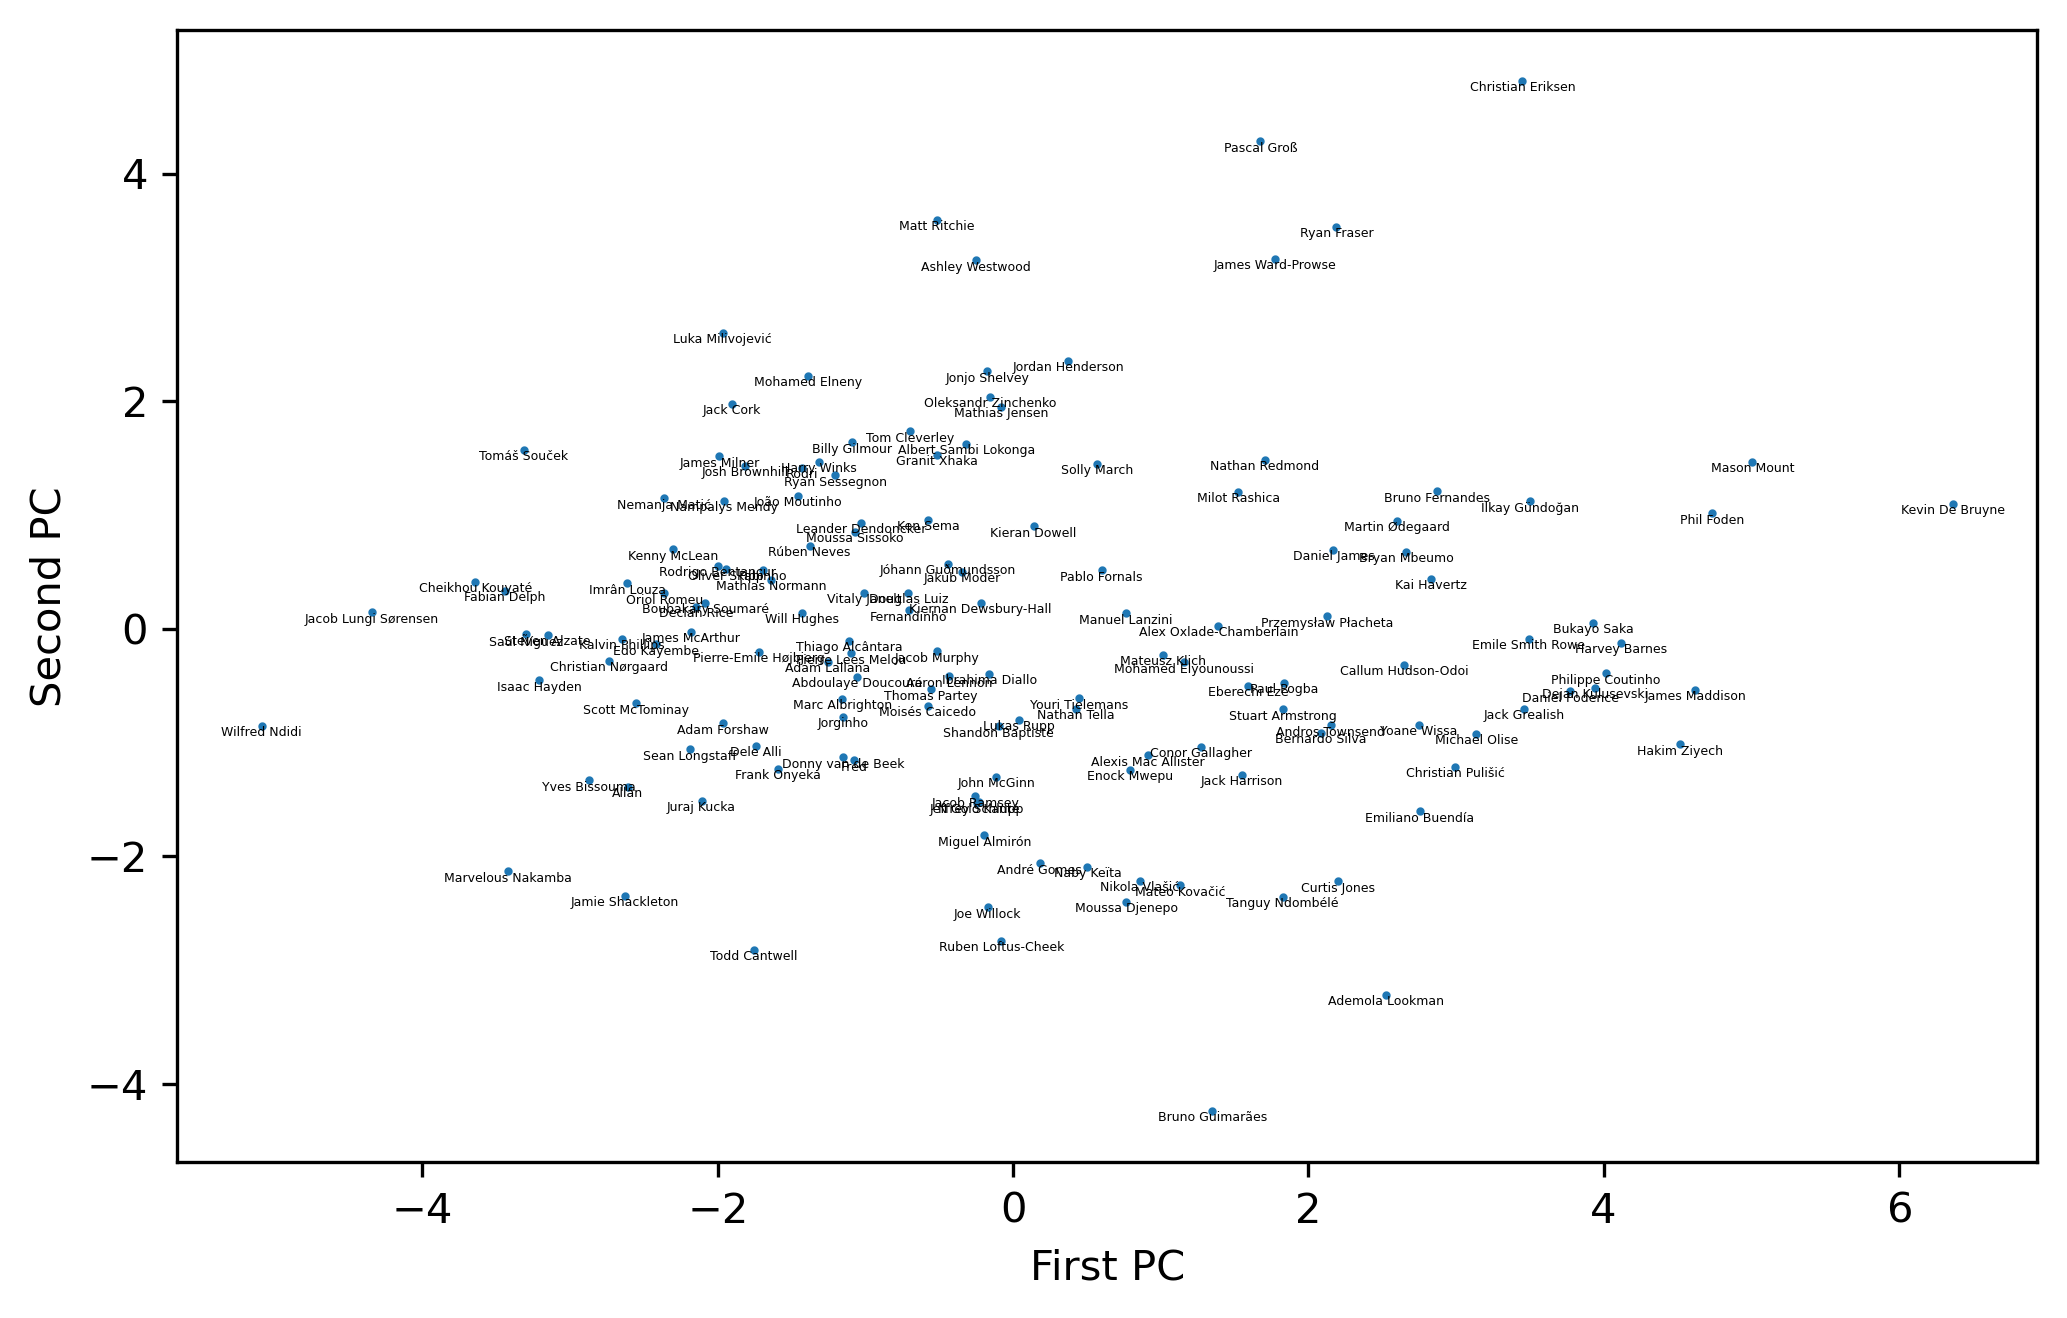

In [10]:
plt.figure( figsize=(8,5), dpi=300 )
plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) # s refers to the size of the dots
plt.xlabel("First PC")
plt.ylabel("Second PC")

# to add labels for all the dots
for player in df_2d.index:
    plt.text(df_2d.loc[player,"First PC"], df_2d.loc[player,"Second PC"], player, fontsize = 3, va="top", ha="center")
plt.show()

## Findings from the Plot

The plot effectively highlights some big-name outliers, e.g. Kevin De Bruyne, Mason Mount, Phil Foden, Christian Eriksen. But perhaps more importantly, it helps us to find out some less-famous outliers, e.g. Wilfred Ndidi, Pascal Groß, Bruno Guimarães, Todd Cantwell.

Power of PCA is to find out similar players. For instance, a well-known sub-category of midfielders is "play-makers", with notable characters of passing well, holding the ball well while also sheltering the defense line. One of the most notable example of play-makers is Jorginho in Chelsea. As you will see from a clearer plot below, players near Jorginho in the plot are likely to be play-makers too.


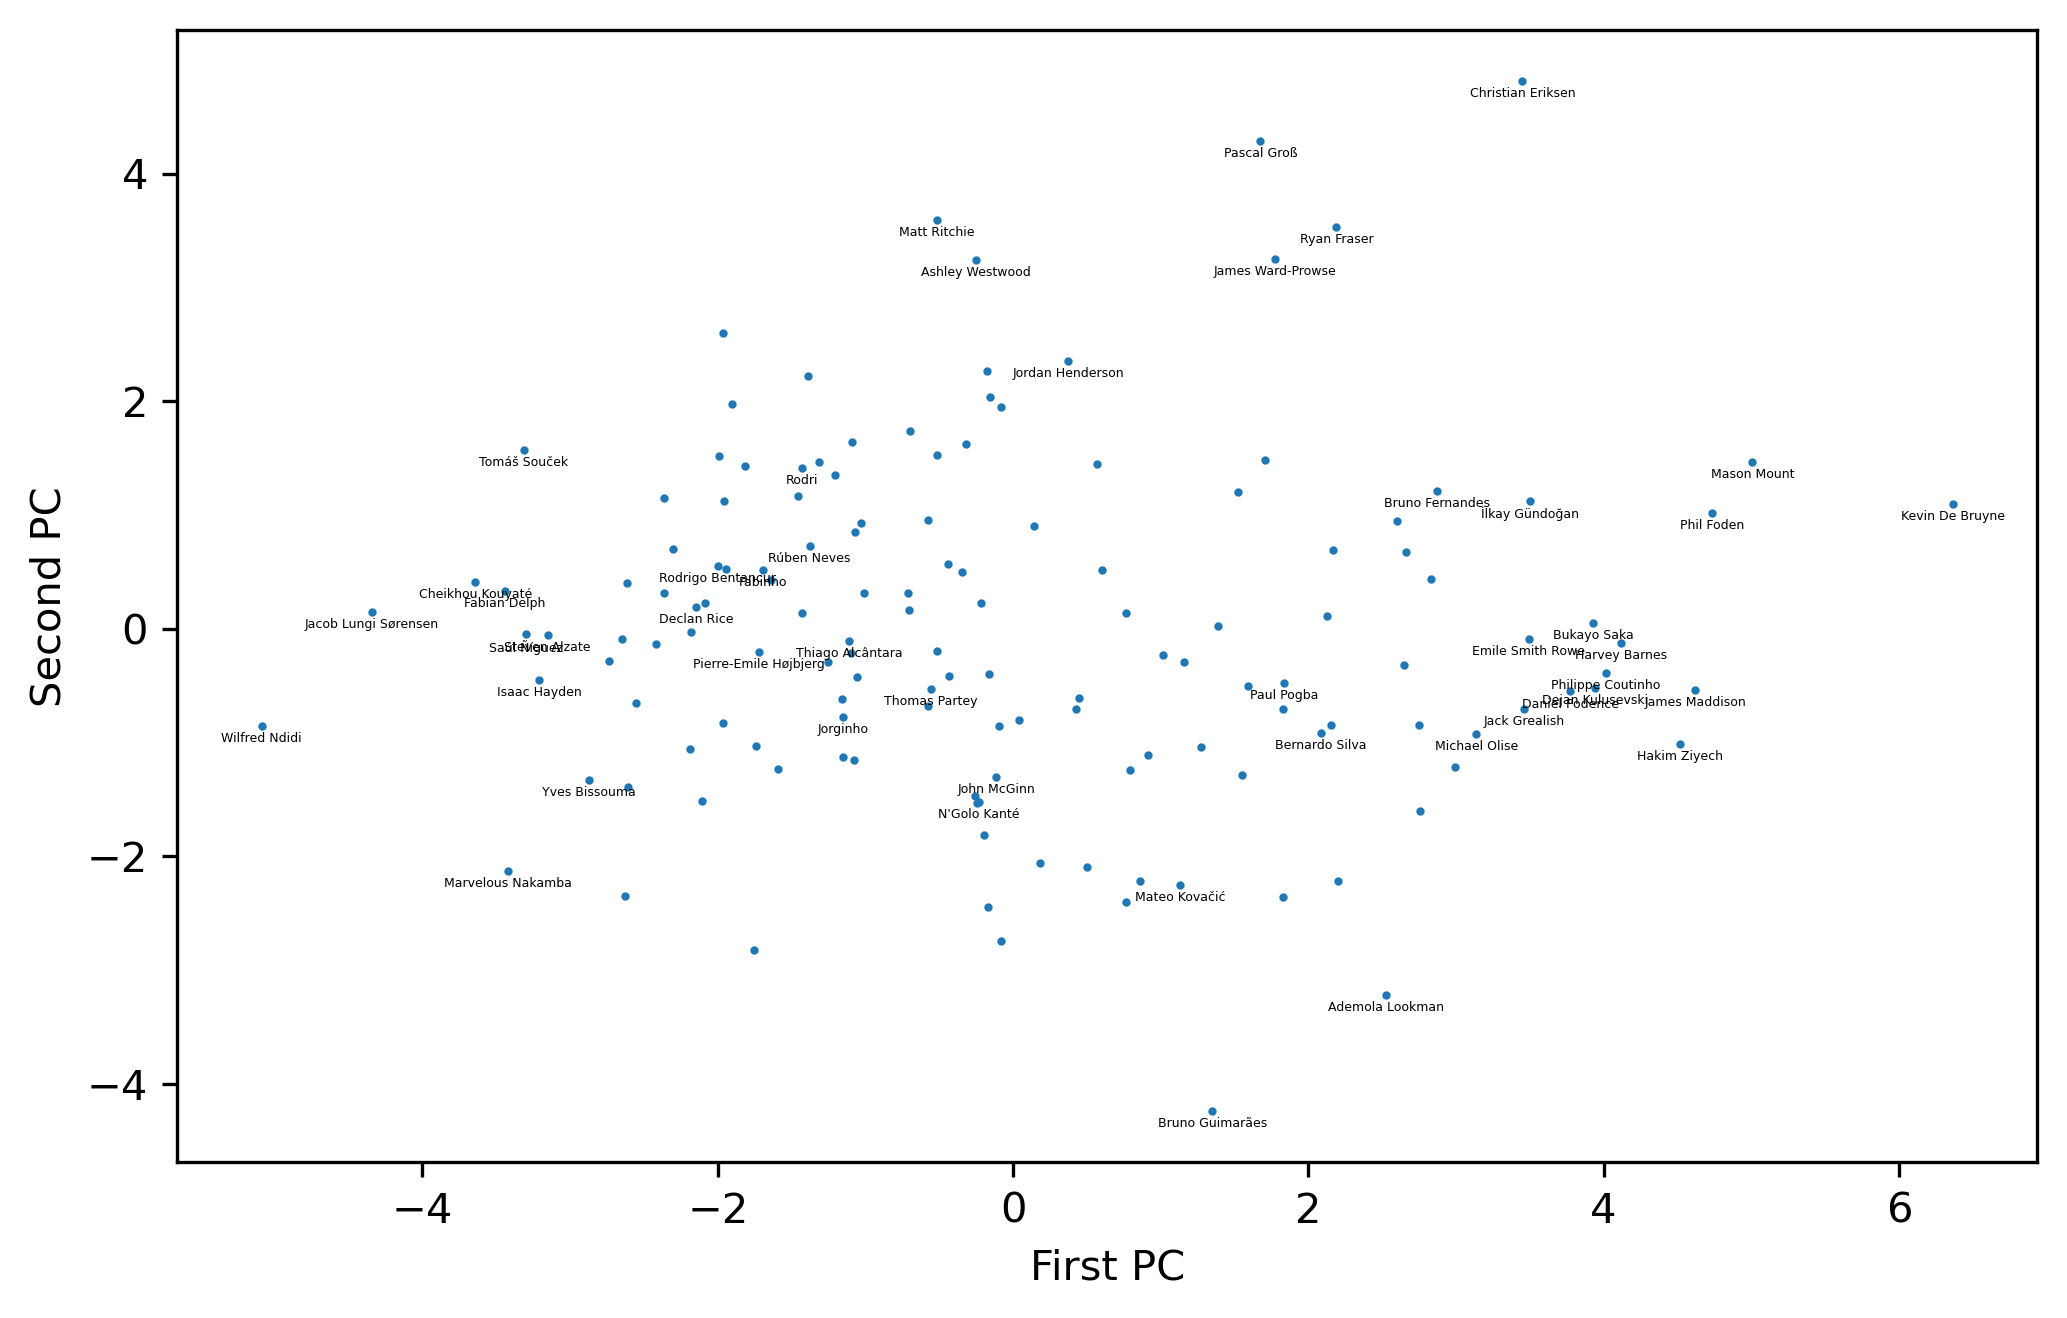

In [12]:
plt.figure( figsize=(8,5), dpi=300 )
plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) 
plt.xlabel("First PC")
plt.ylabel("Second PC")

spot_players = ["Kovačić", "Kanté", "Thiago", "Partey", "Bissouma", "Pogba", "Jorginho", "Rodri", "Bentancur", "McGinn", "Bruno Fernandes",
                "Kulusevski", "Declan Rice", "Højbjerg","Henderson", "Fabinho", "Bernardo Silva", "Neves"]

# we characterize outliers as those players with the absolute value of their First or Second PC projection exceeding 3
for player in df_2d.index:
    spots = [ spot_name in player for spot_name in spot_players ]
    x = df_2d.loc[player,"First PC"]
    y = df_2d.loc[player,"Second PC"]
    if (abs(x) >= 3.0) or (abs(y) >= 3.0) or (True in spots):
        plt.text(x,y-0.05, player, fontsize = 3, va="top", ha="center")
plt.show()

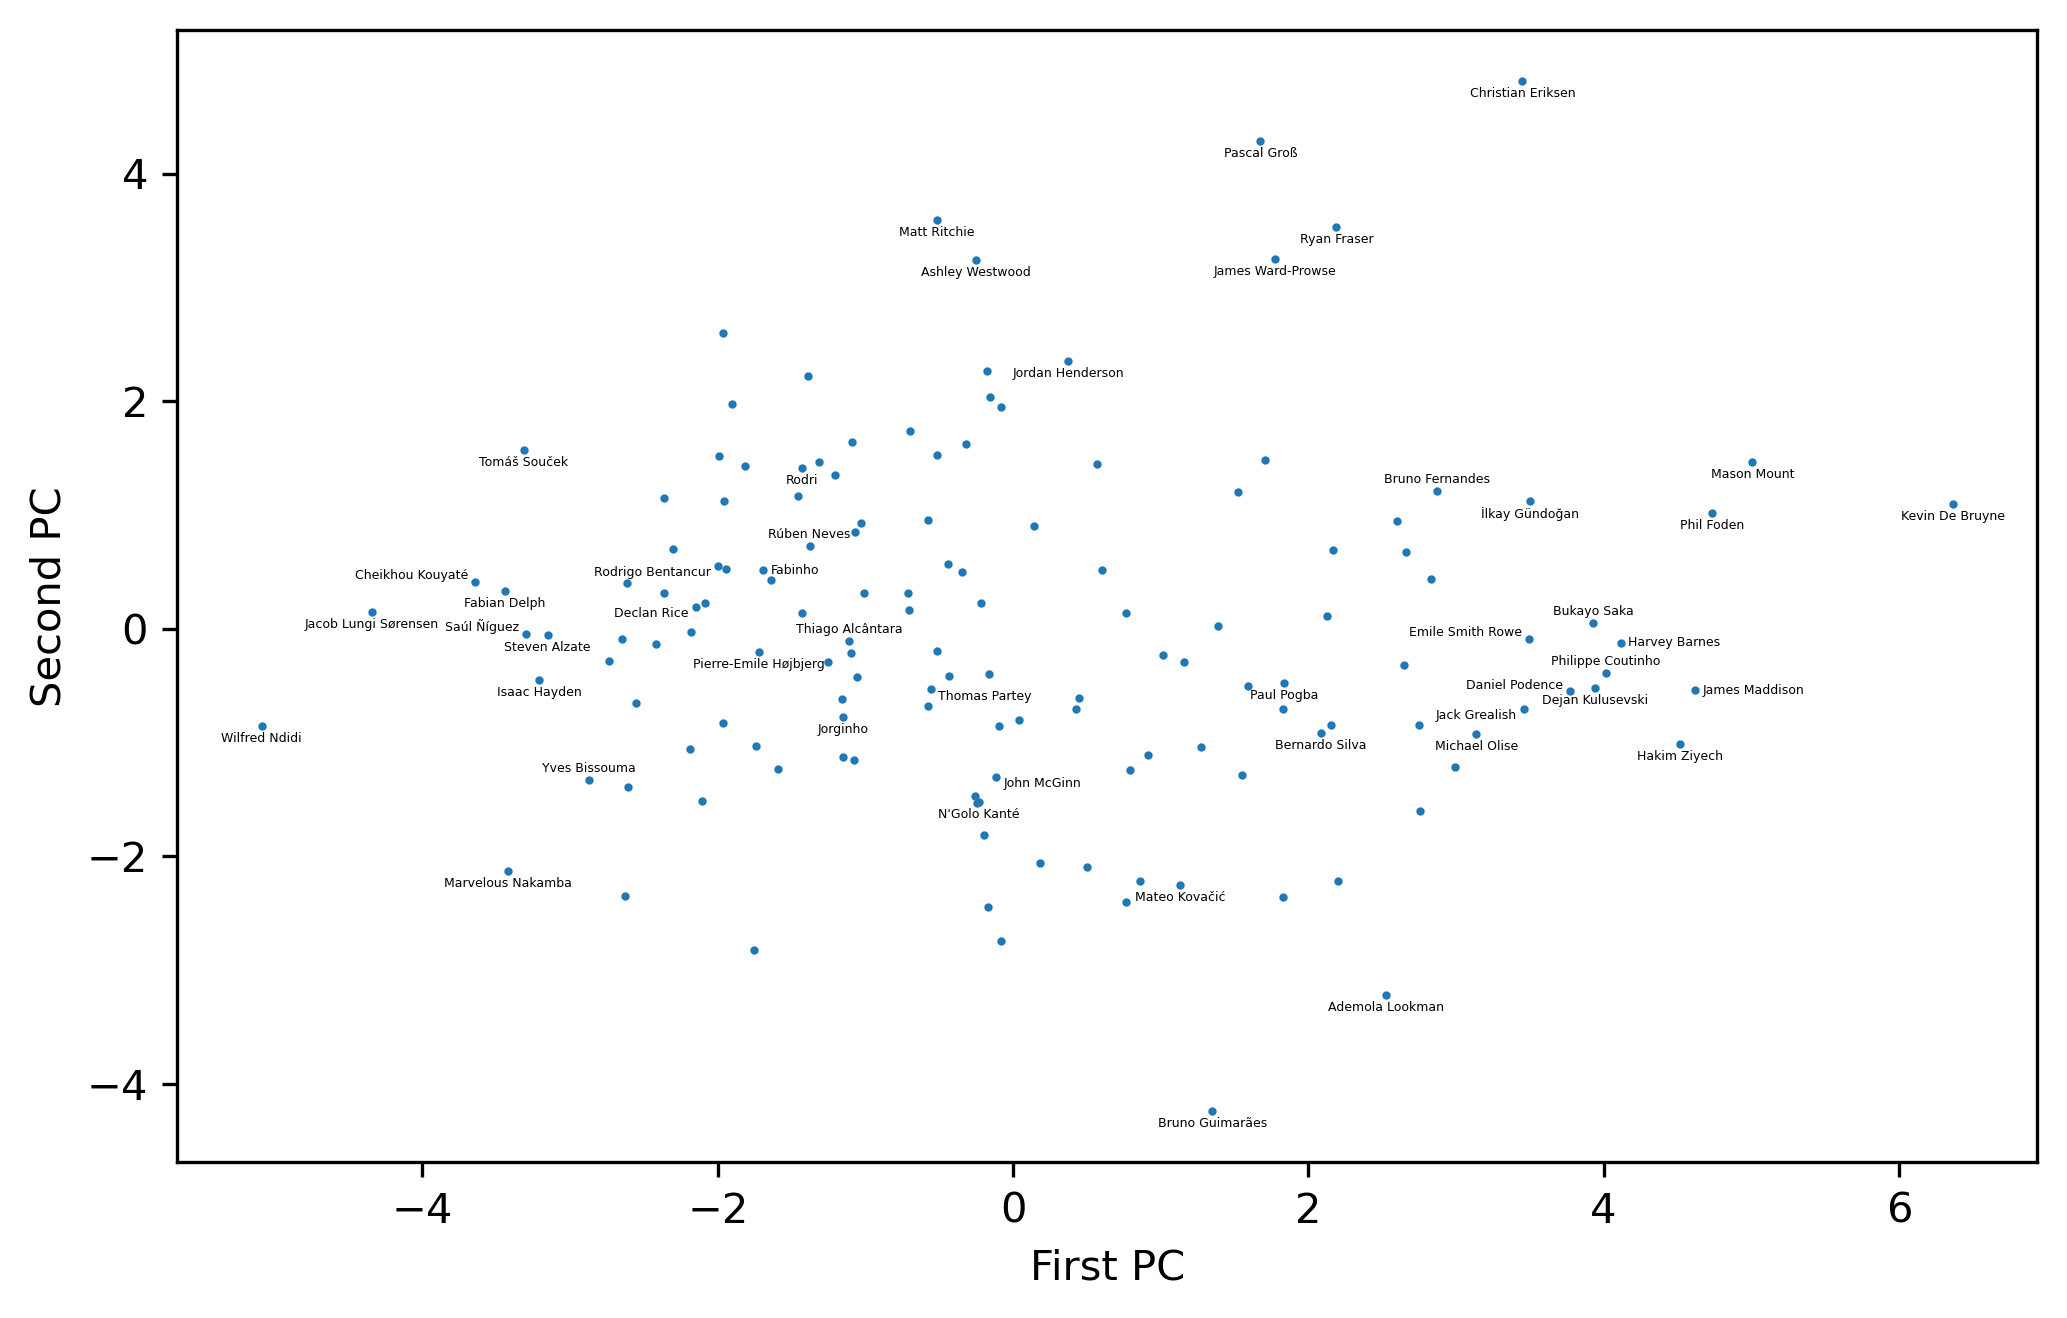

In [14]:
plt.figure( figsize=(8,5), dpi=300 )
plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) # s refers to the size of the dots
plt.xlabel("First PC")
plt.ylabel("Second PC")

def among(name, spot_players):
    spots = [ spot_name in name for spot_name in spot_players ]
    return (True in spots)

spot_players = ["Kovačić", "Kanté", "Thiago", "Partey", "Bissouma", "Pogba", "Jorginho", "Rodri", "Bentancur", "McGinn", "Bruno Fernandes",
                "Kulusevski", "Declan Rice", "Højbjerg","Henderson", "Fabinho", "Bernardo Silva", "Neves"]

# we characterize outliers as those players with the absolute value of their First or Second PC exceeding 3
for player in df_2d.index:
    x = df_2d.loc[player,"First PC"]
    y = df_2d.loc[player,"Second PC"]
    if (abs(x) >= 3.0) or (abs(y) >= 3.0) or (among(player,spot_players)):
        if among(player,["Thiago","Bissouma","Coutinho","Neves","Saka","Bruno Fernandes"]):
            plt.text(x,y+0.05, player, fontsize = 3, va="bottom", ha="center")
        elif among(player,["Podence","Smith Rowe","Kouyaté","Ñíguez"]):
            plt.text(x-0.05,y, player, fontsize = 3, va="bottom", ha="right")
        elif among(player,["Grealish","Declan Rice","Bentancur"]):
            plt.text(x-0.05,y, player, fontsize = 3, va="top", ha="right")
        elif among(player,["Fabinho","Barnes","Maddison"]):
            plt.text(x+0.05,y, player, fontsize = 3, va="center", ha="left")
        elif among(player,["McGinn","Partey","Fabinho"]):
            plt.text(x+0.05,y, player, fontsize = 3, va="top", ha="left")
        else:
            plt.text(x,y-0.05, player, fontsize = 3, va="top", ha="center")
plt.show()

As promised, players near Jorginho, including Thiago Alcântara, Pierre-Emile Højbjerg, Thomas Partey, were acting as play-maker role in their respective teams.

## Trying the Same for Defenders

In [16]:
performanceData = pd.read_csv("EPL2122.csv",index_col="player")

print("The dataset has {} attributes.".format(performanceData.shape[1]))
performanceData.head()

The dataset has 76 attributes.


,team,appearances,matchesStarted,position,minutesPlayed,goals,bigChancesMissed,successfulDribbles,successfulDribblesPercentage,totalShots,...,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,wasFouled,fouls,dispossessed,possessionLost
player,,,,,,,,,,,,,,,,,,,,,
Kevin De Bruyne,Manchester City,30,25,Midfielder,2205,15,0,31,56.36,78,...,89,49.72,12,40.00,101,48.33,27,21,20,482
Trent Alexander-Arnold,Liverpool,32,32,Defender,2853,2,0,19,48.72,51,...,66,44.00,15,53.57,81,45.51,7,12,19,798
Christian Eriksen,Brentford,11,10,Midfielder,938,1,0,8,50.00,22,...,24,43.64,5,45.45,29,43.94,3,5,9,196
Heung-min Son,Tottenham Hotspur,35,35,Forward,3019,23,17,51,55.43,86,...,102,46.58,16,31.37,118,43.70,36,14,46,464
Kenedy,Chelsea,1,1,Unspecified,59,0,0,1,100.00,1,...,6,60.00,0,0.00,6,54.55,0,0,3,19


In [17]:
defenders = performanceData.loc[ ((performanceData["position"] == "Defender") & (performanceData["minutesPlayed"] >= 400)), :]
print("The number of players under consideration is {}.".format(midfielders.shape[0]))
defenders.head()

The number of players under consideration is 151.


,team,appearances,matchesStarted,position,minutesPlayed,goals,bigChancesMissed,successfulDribbles,successfulDribblesPercentage,totalShots,...,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,wasFouled,fouls,dispossessed,possessionLost
player,,,,,,,,,,,,,,,,,,,,,
Trent Alexander-Arnold,Liverpool,32,32,Defender,2853,2,0,19,48.72,51,...,66,44.00,15,53.57,81,45.51,7,12,19,798
Reece James,Chelsea,26,22,Defender,1868,5,1,36,76.60,37,...,100,60.98,17,44.74,117,57.92,31,20,22,297
Kieran Trippier,Newcastle United,6,5,Defender,429,2,0,1,33.33,2,...,21,63.64,10,66.67,31,64.58,3,3,1,99
Andrew Robertson,Liverpool,29,29,Defender,2541,3,0,13,56.52,18,...,58,49.57,26,65.00,84,53.50,9,19,15,519
Joël Matip,Liverpool,31,31,Defender,2790,3,2,9,90.00,35,...,66,68.04,109,68.13,175,68.09,11,13,7,292


In [18]:
retained_attributes = ["totalShots", "assists", "keyPasses", "accurateCrosses", "accurateLongBalls", "accuratePassesPercentage", "successfulDribbles", "groundDuelsWon", "aerialDuelsWon", "dribbledPast", "tackles", "interceptions", "clearances", "fouls"]

defenders_fs = pd.DataFrame(defenders[ [] ]) # this creates a new dataframe which only keeps the index column of midfielder

for att in retained_attributes:
    if "Percentage" not in att:
        new_att = att + "90"
        defenders_fs[ new_att ] = defenders[ att ] / defenders[ "minutesPlayed" ] * 90.0
    else:
        defenders_fs[ att ] = defenders[ att ]

defenders_fs.head()

,totalShots90,assists90,keyPasses90,accurateCrosses90,accurateLongBalls90,accuratePassesPercentage,successfulDribbles90,groundDuelsWon90,aerialDuelsWon90,dribbledPast90,tackles90,interceptions90,clearances90,fouls90
player,,,,,,,,,,,,,,
Trent Alexander-Arnold,1.608833,0.378549,2.839117,2.586751,6.403785,78.14,0.599369,2.082019,0.473186,1.041009,1.261830,1.356467,1.041009,0.378549
Reece James,1.782655,0.433619,2.360814,1.156317,2.071734,89.56,1.734475,4.817987,0.819058,0.626338,1.589936,0.819058,0.867238,0.963597
Kieran Trippier,0.419580,0.000000,1.468531,2.517483,3.566434,65.02,0.209790,4.405594,2.097902,1.258741,3.566434,2.097902,2.097902,0.629371
Andrew Robertson,0.637544,0.354191,1.983471,1.593861,2.089728,85.17,0.460449,2.054309,0.920897,0.531287,1.275089,0.814640,1.806375,0.672963
Joël Matip,1.129032,0.096774,0.419355,0.000000,3.516129,88.53,0.290323,2.129032,3.516129,0.354839,1.516129,1.419355,2.903226,0.419355


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(defenders_fs)

df = pd.DataFrame(defenders_fs)
df.loc[:,:] = data
df.head()

,totalShots90,assists90,keyPasses90,accurateCrosses90,accurateLongBalls90,accuratePassesPercentage,successfulDribbles90,groundDuelsWon90,aerialDuelsWon90,dribbledPast90,tackles90,interceptions90,clearances90,fouls90
player,,,,,,,,,,,,,,
Trent Alexander-Arnold,2.638820,4.041899,4.318150,4.372466,3.104553,-0.382898,0.247112,-0.579572,-1.522887,1.058613,-0.592218,0.228598,-1.669883,-1.259218
Reece James,3.090311,4.727298,3.409623,1.577833,-0.233346,1.400142,2.672452,1.468893,-1.163945,-0.014339,-0.157993,-0.912923,-1.814604,0.217475
Kieran Trippier,-0.450173,-0.669505,1.714752,4.237137,0.918338,-2.431365,-0.585287,1.160128,0.163225,1.621989,2.457763,1.803496,-0.789682,-0.626131
Andrew Robertson,0.115972,3.738745,2.692869,2.432661,-0.219481,0.714718,-0.049715,-0.600319,-1.058257,-0.260282,-0.574671,-0.922307,-1.032471,-0.516101
Joël Matip,1.392575,0.534943,-0.278137,-0.681258,0.879578,1.239325,-0.413217,-0.544373,1.635044,-0.716838,-0.255671,0.362180,-0.118992,-1.156222


In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)

PCA()

In [23]:
ratios = pca.explained_variance_ratio_
print(ratios)
print("The first two PC explain {}% of the variance.".format(sum(ratios[:2])*100))
print("The first four PC explain {}% of the variance.".format(sum(ratios[:4])*100))

[0.36963863 0.16379565 0.08456208 0.07711469 0.06682866 0.04899702
 0.04559714 0.03722201 0.03160537 0.02741369 0.02193749 0.0165118
 0.00605048 0.00272528]
The first two PC explain 53.343428270815885% of the variance.
The first four PC explain 69.51110529808278% of the variance.


In [24]:
data_transformed = pca.transform(df)

data_2d = data_transformed[:,:2]

df_2d = pd.DataFrame(df[ [] ]) 
df_2d["First PC"] = data_2d[:,0]
df_2d["Second PC"] = data_2d[:,1]

df_2d.head()

,First PC,Second PC
player,,
Trent Alexander-Arnold,4.277715,6.004204
Reece James,5.290494,5.051800
Kieran Trippier,3.508527,-1.209564
Andrew Robertson,2.511963,4.238703
Joël Matip,-1.622072,1.233822


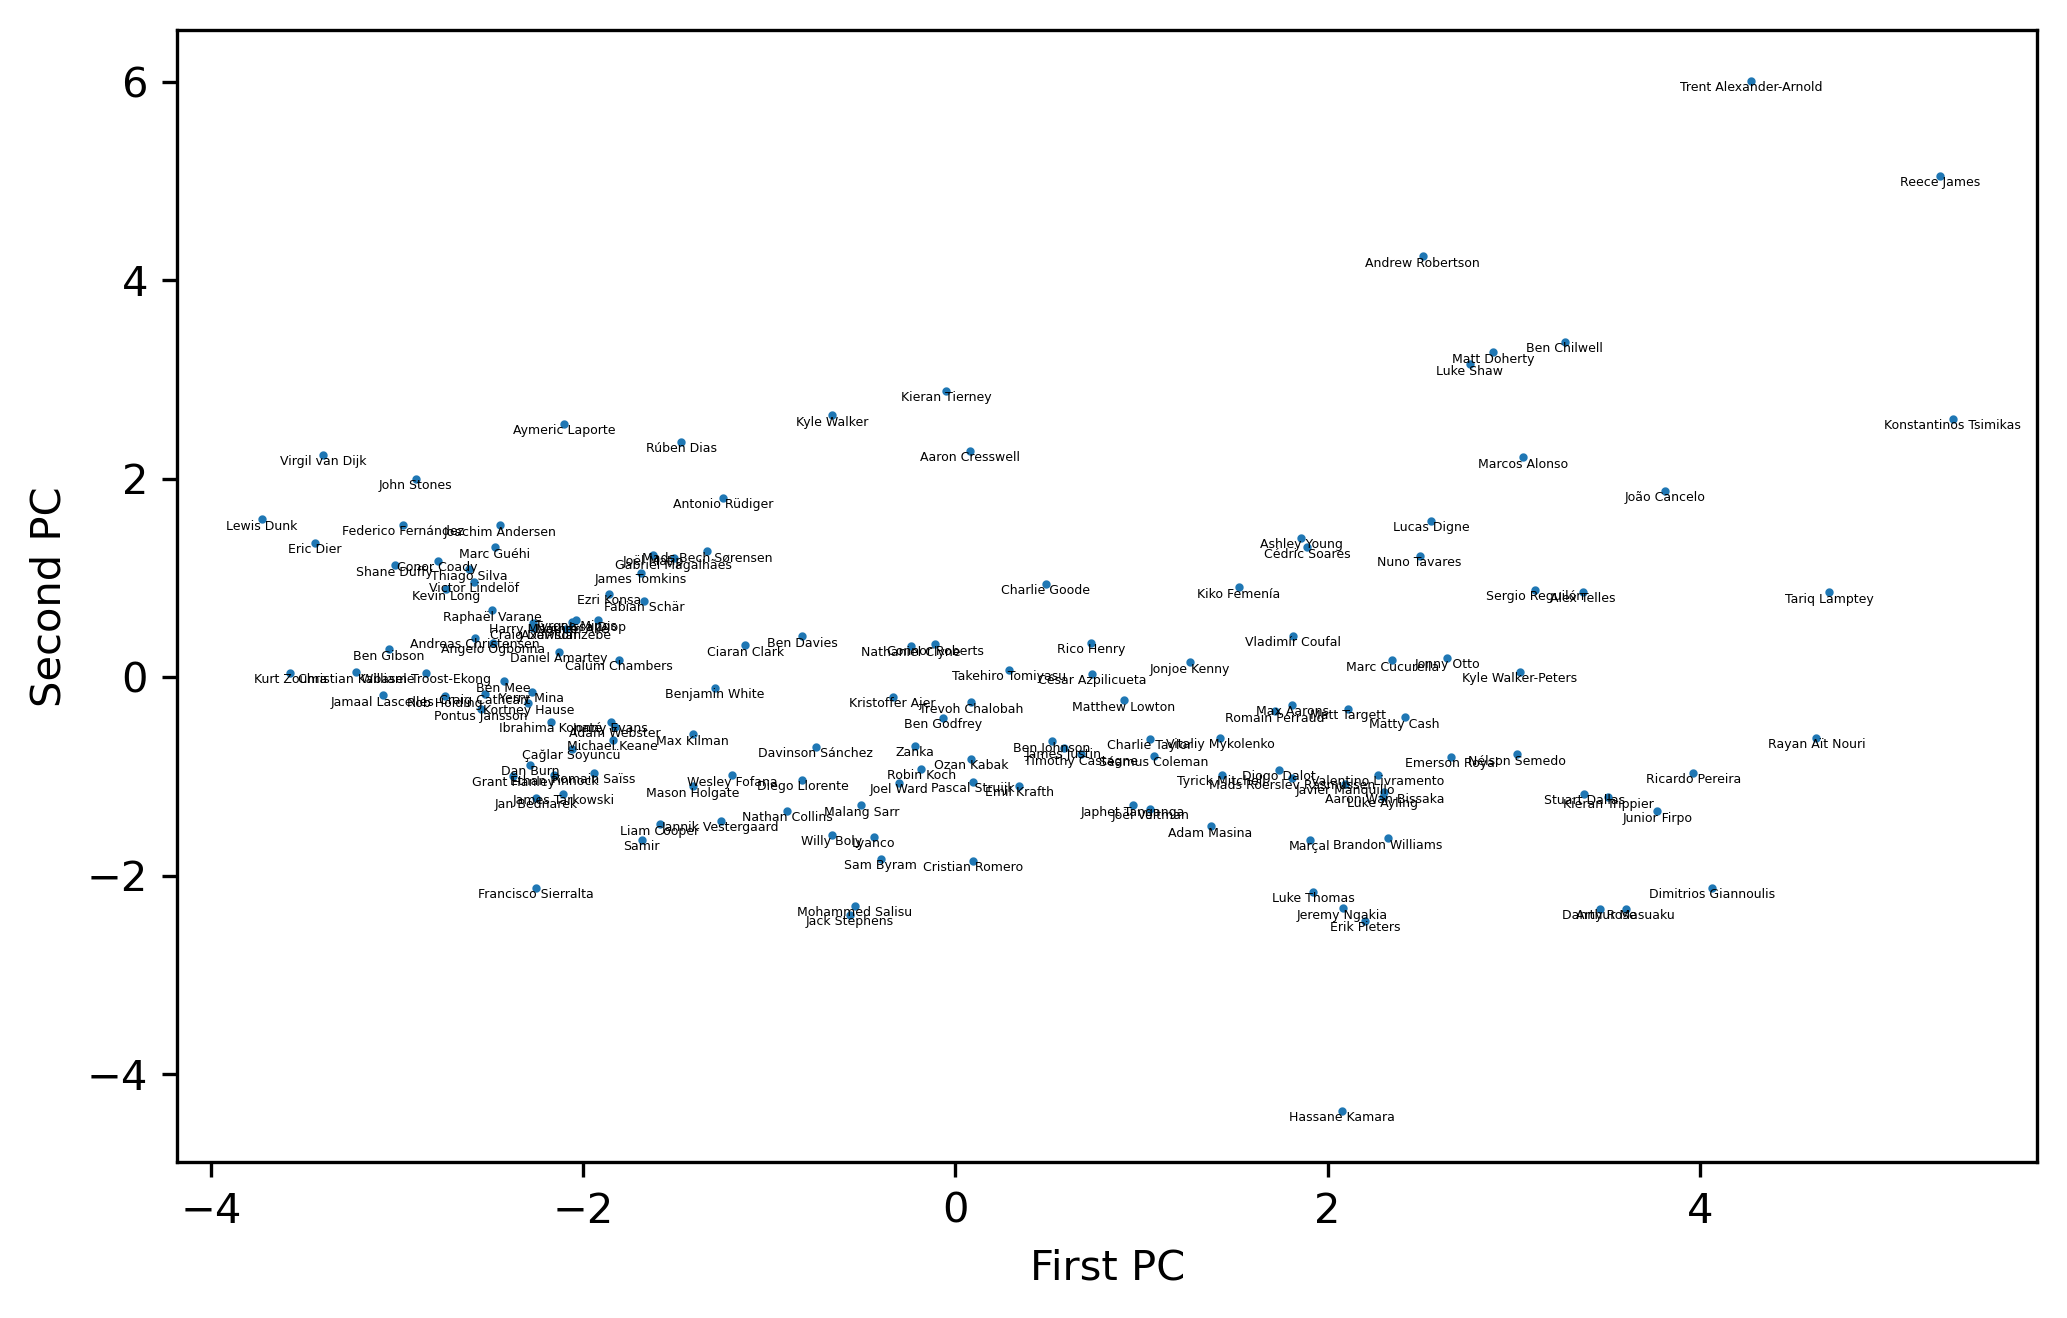

In [26]:
plt.figure( figsize=(8,5), dpi=300 )
plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) # s refers to the size of the dots
plt.xlabel("First PC")
plt.ylabel("Second PC")

for player in df_2d.index:
    plt.text(df_2d.loc[player,"First PC"], df_2d.loc[player,"Second PC"], player, fontsize = 3, va="top", ha="center")
plt.show()

In [27]:
# plt.figure( figsize=(8,5), dpi=300 )
# plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) # s refers to the size of the dots
# plt.xlabel("First PC")
# plt.ylabel("Second PC")

# # a list of notable players we ought to label, no matter they appear to be outliers or not
# spot_players = ["Kovačić", "Kanté", "Thiago", "Partey", "Bissouma", "Pogba", "Jorginho", "Rodri", "Bentancur", "McGinn", "Bruno Fernandes",
#                "Kulusevski", "Declan Rice", "Højbjerg","Henderson", "Fabinho", "Bernardo Silva", "Neves"]

# # we characterize outliers as those players with the absolute value of their First or Second PC projection exceeding 3
# for player in df_2d.index:
#     spots = [ spot_name in player for spot_name in spot_players ]
#     x = df_2d.loc[player,"First PC"]
#     y = df_2d.loc[player,"Second PC"]
#     if (abs(x) >= 3.0) or (abs(y) >= 3.0) or (True in spots):
#         plt.text(x,y-0.05, player, fontsize = 3, va="top", ha="center")
# plt.show()

In [28]:
# plt.figure( figsize=(8,5), dpi=300 )
# plt.scatter( df_2d["First PC"], df_2d["Second PC"], label = df_2d.index, s=1 ) # s refers to the size of the dots
# plt.xlabel("First PC")
# plt.ylabel("Second PC")

# def among(name, spot_players):
#     spots = [ spot_name in name for spot_name in spot_players ]
#     return (True in spots)

# # a list of notable players we ought to label, no matter they appear to be outliers or not
# spot_players = ["Kovačić", "Kanté", "Thiago", "Partey", "Bissouma", "Pogba", "Jorginho", "Rodri", "Bentancur", "McGinn", "Bruno Fernandes",
#                 "Kulusevski", "Declan Rice", "Højbjerg","Henderson", "Fabinho", "Bernardo Silva", "Neves"]

# # we characterize outliers as those players with the absolute value of their First or Second PC exceeding 3
# for player in df_2d.index:
#     x = df_2d.loc[player,"First PC"]
#     y = df_2d.loc[player,"Second PC"]
#     if (abs(x) >= 3.0) or (abs(y) >= 3.0) or (among(player,spot_players)):
#         if among(player,["Thiago","Bissouma","Coutinho","Neves","Saka","Bruno Fernandes"]):
#             plt.text(x,y+0.05, player, fontsize = 3, va="bottom", ha="center")
#         elif among(player,["Podence","Smith Rowe","Kouyaté","Ñíguez"]):
#             plt.text(x-0.05,y, player, fontsize = 3, va="bottom", ha="right")
#         elif among(player,["Grealish","Declan Rice","Bentancur"]):
#             plt.text(x-0.05,y, player, fontsize = 3, va="top", ha="right")
#         elif among(player,["Fabinho","Barnes","Maddison"]):
#             plt.text(x+0.05,y, player, fontsize = 3, va="center", ha="left")
#         elif among(player,["McGinn","Partey","Fabinho"]):
#             plt.text(x+0.05,y, player, fontsize = 3, va="top", ha="left")
#         else:
#             plt.text(x,y-0.05, player, fontsize = 3, va="top", ha="center")
# plt.show()